In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
obs = pd.read_csv('observations.csv')
info = pd.read_csv('species_info.csv')

In [5]:
print(obs.head())
print(obs.isna().sum())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
scientific_name    0
park_name          0
observations       0
dtype: int64


In [7]:
print(info.head())
print(info.isna().sum())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


In [81]:
data = pd.merge(obs, info, on=['scientific_name'])
data.park_name = data.park_name.str.replace('National Park','')
print(data.head())

            scientific_name               park_name  observations  \
0        Vicia benghalensis  Great Smoky Mountains             68   
1            Neovison vison  Great Smoky Mountains             77   
2         Prunus subcordata               Yosemite            138   
3      Abutilon theophrasti                  Bryce             84   
4  Githopsis specularioides  Great Smoky Mountains             85   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1          Mammal                       American Mink                 NaN  
2  Vascular Plant                        Klamath Plum                 NaN  
3  Vascular Plant                          Velvetleaf                 NaN  
4  Vascular Plant                      Common Bluecup                 NaN  


In [113]:
print(data.groupby('category').size())

category
Amphibian              328
Bird                  2364
Fish                   524
Mammal                1200
Nonvascular Plant     1332
Reptile                324
Vascular Plant       19560
dtype: int64


In [112]:
print(data.groupby('conservation_status').size())

conservation_status
Endangered             80
In Recovery            24
Species of Concern    732
Threatened             44
dtype: int64


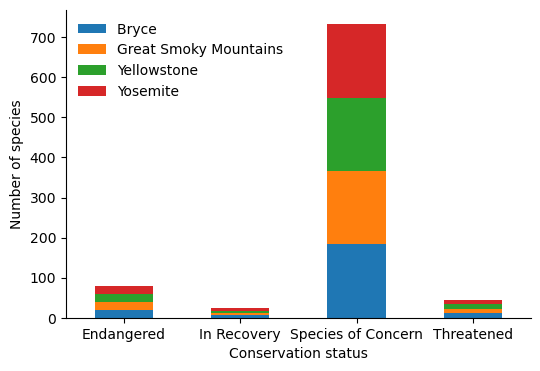

In [93]:
df = data.dropna(subset='conservation_status').groupby(['conservation_status','park_name']).scientific_name.count()

ax = df.unstack().plot(kind='bar', stacked=True, figsize=(6,4))
ax.set_ylabel('Number of species')
ax.set_xlabel('Conservation status')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=0)
plt.legend(title='', frameon=False)
plt.show()

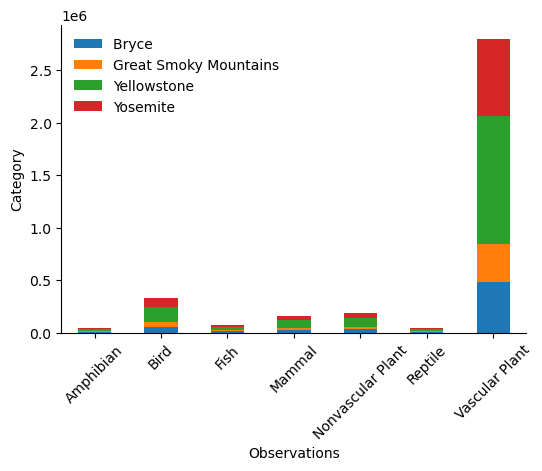

In [92]:
df = data.groupby(['category','park_name']).observations.sum()

ax = df.unstack().plot(kind='bar', stacked=True, figsize=(6,4))
ax.set_ylabel('Category')
ax.set_xlabel('Observations')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45)
plt.legend(title='', frameon=False)
plt.show()

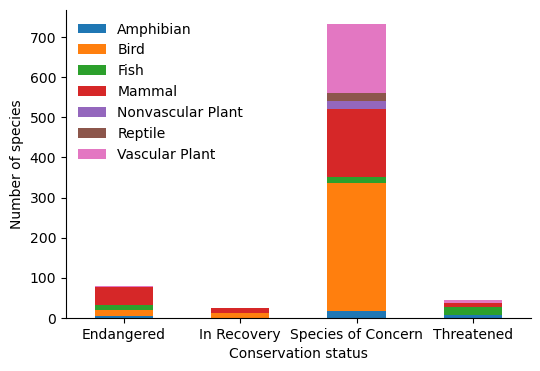

In [ ]:
df = data.dropna(subset='conservation_status').groupby(['conservation_status','category']).scientific_name.count()

ax = df.unstack().plot(kind='bar', stacked=True, figsize=(6,4))
ax.set_ylabel('Number of species')
ax.set_xlabel('Conservation status')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=0)
plt.legend(title='', frameon=False)
plt.show()

In [106]:
data.groupby(['park_name','category'])['observations'].max()
obs_max = data.loc[data.groupby(['park_name','category'])["observations"].idxmax()]
print(obs_max.drop(columns=['conservation_status','common_names']))

                           scientific_name               park_name  \
5835                        Rana sylvatica                  Bryce    
14253                        Bubulcus ibis                  Bryce    
25524                  Notropis photogenis                  Bryce    
12234                     Martes americana                  Bryce    
24529              Brachythecium rutabulum                  Bryce    
2863             Lampropeltis getula nigra                  Bryce    
14497                 Valerianella radiata                  Bryce    
13912                       Rana palustris  Great Smoky Mountains    
19101                    Branta hutchinsii  Great Smoky Mountains    
12333                     Lepomis gibbosus  Great Smoky Mountains    
23522                    Lasiurus borealis  Great Smoky Mountains    
15931                Pylaisiella polyantha  Great Smoky Mountains    
25261   Lampropeltis triangulum elapsoides  Great Smoky Mountains    
9737              So